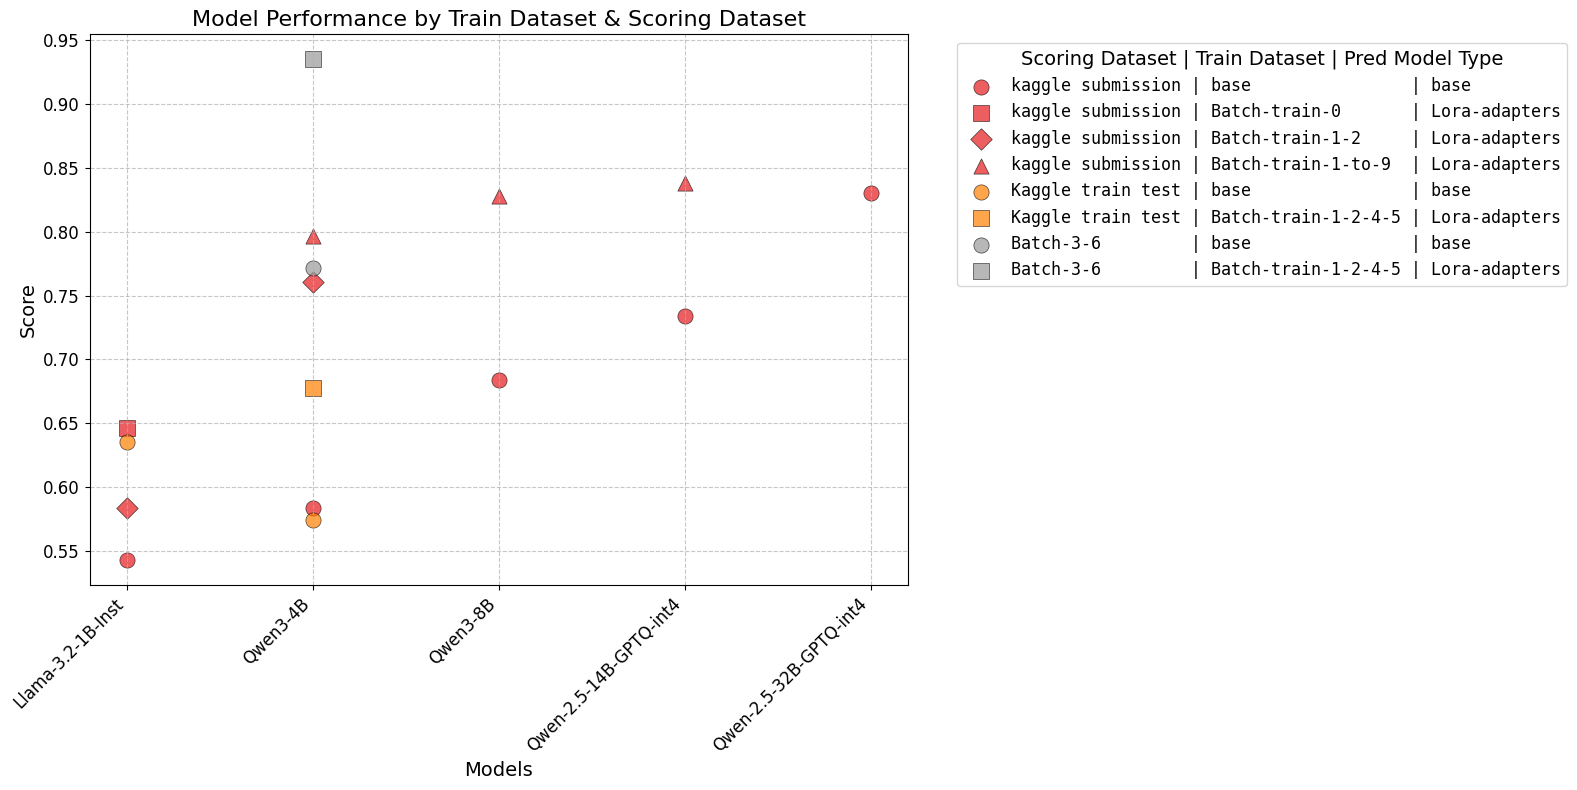

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# Load CSV
df = pd.read_csv("status.csv", na_values=['', ' '])

# Melt wide → long
df_melted = df.melt(
    id_vars=["train_dataset", "pred_model_type", "scoring_dataset"],
    var_name="Model",
    value_name="Score"
)

# Remove rows where Score is NaN
df_melted = df_melted.dropna(subset=['Score'])

# Ensure Model is string and Score is numeric
df_melted["Model"] = df_melted["Model"].astype(str)
df_melted["Score"] = pd.to_numeric(df_melted["Score"])

# Calculate max widths for alignment
max_scoring_width = max(len(str(x)) for x in df_melted['scoring_dataset'].unique())
max_train_width = max(len(str(x)) for x in df_melted['train_dataset'].unique())
max_pred_width = max(len(str(x)) for x in df_melted['pred_model_type'].unique())

# Plot
plt.figure(figsize=(16, 8))
markers = ["o", "s", "D", "^", "v", "P", "X", "*", "<", ">"]

# Get unique scoring datasets for color assignment
unique_scoring_datasets = df_melted['scoring_dataset'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_scoring_datasets)))
scoring_dataset_color_map = dict(zip(unique_scoring_datasets, colors))

# Group by scoring_dataset first, then by train dataset and pred_model_type within each scoring dataset
for scoring_dataset in unique_scoring_datasets:
    scoring_dataset_data = df_melted[df_melted['scoring_dataset'] == scoring_dataset]
    unique_combinations = scoring_dataset_data[['train_dataset', 'pred_model_type']].drop_duplicates()
    
    for j, (_, row) in enumerate(unique_combinations.iterrows()):
        train_dataset = row['train_dataset']
        pred_model_type = row['pred_model_type']
        subset = scoring_dataset_data[
            (scoring_dataset_data['train_dataset'] == train_dataset) & 
            (scoring_dataset_data['pred_model_type'] == pred_model_type)
        ]
        if len(subset) > 0:
            # Create aligned legend label with consistent spacing
            aligned_label = f"{scoring_dataset:<{max_scoring_width}} | {train_dataset:<{max_train_width}} | {pred_model_type}"
            
            plt.scatter(
                x=subset["Model"], 
                y=subset["Score"], 
                marker=markers[j % len(markers)], 
                s=120, 
                color=scoring_dataset_color_map[scoring_dataset],  # Same color for same scoring_dataset
                label=aligned_label,
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5
            )

plt.xlabel("Models", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Model Performance by Train Dataset & Scoring Dataset", fontsize=16)

# Create monospace font properties for legend
mono_font = FontProperties(family='monospace', size=12)

plt.legend(
    title="Scoring Dataset | Train Dataset | Pred Model Type", 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    prop=mono_font,  # Use FontProperties for monospace
    title_fontsize=14
)
plt.grid(True, linestyle="--", alpha=0.7)

# Make axis ticks bigger
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
